As Alberta [continues](https://www.thebeaumontnews.ca/news/local-news/new-hydrogen-facility-proposed-for-albertas-industrial-heartland) [down](https://www.cbc.ca/news/canada/edmonton/petrochemical-project-alberta-investment-billions-1.7043889) it's path to [the hydrogen economy](https://www.alberta.ca/hydrogen-roadmap), with more industrial facilities transitioning to hydrogen as a fuel, and more producers of hydrogen announcing new plants and expansions, questions around the impact of fugitive hydrogen emissions linger.

In [1]:
#| echo: false
#| output: false
# This is some boiler plate to make the notebook stand alone
# Creates a temporary project and adds only the packages used
# in the notebook to the Project.toml
using Pkg

Pkg.activate(; temp=true)
Pkg.add([PackageSpec(name="Plots", version="1.39.0"),
         PackageSpec(name="Unitful", version="1.19.0"),
         PackageSpec(name="LaTeXStrings", version="1.3.1")])
Pkg.instantiate();

  Activating new project at `/tmp/jl_7XqVA8`
   Resolving package versions...
    Updating `/tmp/jl_7XqVA8/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  [91a5bcdd] + Plots v1.39.0
  [1986cc42] + Unitful v1.19.0
    Updating `/tmp/jl_7XqVA8/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.8
  [944b1d66] + CodecZlib v0.7.3
  [35d6a980] + ColorSchemes v3.24.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.10
  [34da2185] + Compat v4.12.0
  [f0e56b4a] + ConcurrentUtilities v2.3.0
  [d38c429a] + Contour v0.6.2
  [9a962f9c] + DataAPI v1.15.0
  [864edb3b] + DataStructures v0.18.16
  [8bb1440f] + DelimitedFiles v1.9.1
  [ffbed154] + DocStringExtensions v0.9.3
  [460bff9d] + ExceptionUnwrapping v0.1.10
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
⌅ [28b8d3ca] + GR v0.72.10
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.10.1
  [92d709cd] + IrrationalConstants v0.2.2
  [1019f520] + 

## The climate impacts of fugitive hydrogen

Hydrogen is not, itself, a [greenhouse gas](https://en.wikipedia.org/wiki/Greenhouse_gas), in the sense that hydrogen does not significantly absorb infrared radiation. However hydrogen does have a significant global warming potential. Hydrogen influences chemical processes in the atmosphere that impact other greenhouse gases. In particular hydrogen preferentially reacts with oxidants in the air, oxidants that would otherwise be available to oxidize methane, leading to methane having a longer lifetime in the atmosphere. It also increases tropospheric ozone, both an important actor in ground-level pollution and a greenhouse gas.[@sand-2023 page 2] There has been increased recognition of this in the literature[@dutta-2023; @bertagni-2023; @ocko-2022], as there are growing plans to transition many sectors of the economy to hydrogen. But this concern has not, as of yet, lead to hydrogen being listed on the standard tables of greenhouse gases used for emissions reporting, national inventories, and, importantly, "carbon tax" programs.[^3] As a consequence I haven't seen a lot of effort, from industry, to quantify the climate impact of switching to hydrogen due to those fugitive emissions. Typical modeling of a hydrogen transition project (i.e. transitioning from natural gas to hydrogen as a fuel source for combustion) focuses on the combustion products and, if there is any attention paid to fugitive emissions, it is to claim that fugitive emissions will "disappear" as hydrogen "is not a greenhouse gas".

[^3]: Hydrogen is not listed on the most recent IPCC table of greenhouse gases, @smith-2021, Table 7.SM.7.
    
    Hydrogen is also not listed in Schedule 1 of the *Technology Innovation and Emissions Reduction Regulation*, [AR 133/2019](https://open.alberta.ca/publications/2019_133), which is the industrial "carbon tax" in Alberta.

Taking the broader view of hydrogen's impact on atmospheric chemistry, it has a GWP100 of 11.6 as compared to the methane's GWP100 of 29.8[^4] and so, assuming similar leak rates, one would expect that a transition from natural gas (primarily methane) to hydrogen would lead to a reduction in overall climate impact. Though this is also another point towards [hydrogen not actually being a zero emissions fuel](/posts/hydrogen_blending/#greenhouse-gas-emissions).

[^4]: Hydrogen GWP100 from @sand-2023 page 5. Methane GWP100 is that for fossil fuel derived methane from @forster-2023 page 1017.

## A first look at estimating leak rates

The first time this question landed on my desk it was related to a project to transition a large petrochemical facility from natural gas to hydrogen fuel gas. I did some back of the envelope calculations to estimate the climate impact, in CO<sub>2</sub>-e, of hydrogen fugitive emissions from this system with a few basic assumptions:

1. Natural gas is entirely methane and the hydrogen fuel gas is pure hydrogen.
2. Methane and hydrogen are ideal gases
3. Fugitive emissions all come from leaks, which are just holes in the pressure envelope
4. The system pressure is high enough that flow is choked

The first assumption is not as close as you might think, at least in this part of Alberta, the utility natural gas to the site is ~90% (mol) methane (that the hydrogen is essentially pure was a much closer approximation in this case). The second assumption is probably closer, though it will depend on the actual line pressure, it is something of a joke among chemical engineers that all gases are ideal gases unless we're absolutely forced to do it otherwise.

The third assumption is at least superficially reasonable, here I am imagining leaks at flanges to be basically holes in the gaskets, gaps due to misaligned fittings, or possibly pinhole leaks in the metal itself (hopefully less likely, though that depends on how seriously you take mechanical integrity). The standard way of estimating flow from a hole or orifice uses a discharge coefficient *c<sub>D</sub>* which is a function of geometry and not the gas moving through it.

The other main component of fugitive emissions from this system would be low level venting, typically seen when burners start and stop. During start-up some volume of fuel gas is purged before the burner actually lights and similarly a small volume leaks out after the burner is turned off. For some systems, where the burners are starting and stopping frequently, this can be a major component of fugitive emissions. I'm choosing to neglect those, or consider those part of *stack emissions*.

The fourth assumption is pretty reasonable for the fuel gas distribution system at an industrial facility, where the line pressures are relatively high. This means that the leak rate for any given hole is independent of the system pressure and the flow will be turbulent.

Pulling these together and assuming that for any given leak in the distribution network the mass flow is given by the equation for an ideal gas through an isentropic nozzle:

$$  \dot{m} = c_d A_h \sqrt{ \rho_1 P_1 k \left( 2 \over k+1 \right)^{k+1 \over k-1} } $$

The ratio of mass flow of hydrogen to that of methane is then:

$$  {\dot{m}_{H2} \over \dot{m}_{CH4} } = \sqrt{ {\rho_{H2} \over \rho_{CH4}} {P_{1,H2} \over P_{1,CH4}} { {k_{H2} \left( 2 \over k_{H2}+1 \right)^{k_{H2}+1 \over k_{H2}-1} } \over {k_{CH4} \left( 2 \over k_{CH4}+1 \right)^{k_{CH4}+1 \over k_{CH4}-1} } } }$$

Assuming the system pressure, *P<sub>1</sub>*, after having switched to hydrogen, is the same as the system pressure when operating natural gas.

$$  {\dot{m}_{H2} \over \dot{m}_{CH4} } = \sqrt{ {\rho_{H2} \over \rho_{CH4}} { {k_{H2} \left( 2 \over k_{H2}+1 \right)^{k_{H2}+1 \over k_{H2}-1} } \over {k_{CH4} \left( 2 \over k_{CH4}+1 \right)^{k_{CH4}+1 \over k_{CH4}-1} } } }$$

For a system delivering fuel gas [there is a good reason to assume this](/posts/hydrogen_blending/#energy-per-unit-of-pressure-drop) as the system will deliver approximately the same energy (in terms of HHV) when operated at the same pressure (pure methane versus pure hydrogen). Though this is worth keeping in mind as the hydrogen line can operate at *slightly* lower pressures while delivering the same heating value, which also reduces the leak rate. This effect is small at low and moderate pressures but could be important at high pressures.

Because everything related to the particular hole and the conditions around it canceled out, we have gone from a relation for a single leak in a network to a relation that holds for the whole system. Since this was a back of the envelope calculation, I further assumed that as $k_{H2}$ is within 10% of $k_{CH4}$ then

$$  { {k_{H2} \left( 2 \over k_{H2}+1 \right)^{k_{H2}+1 \over k_{H2}-1} } \over {k_{CH4} \left( 2 \over k_{CH4}+1 \right)^{k_{CH4}+1 \over k_{CH4}-1} } } \approx 1 $$

and thus

$$  {\dot{m}_{H2} \over \dot{m}_{CH4} } = \sqrt{ {\rho_{H2} \over \rho_{CH4}} } = \sqrt{ {MW_{H2} \over MW_{CH4}} } $$

putting this in terms of emissions in CO<sub>2</sub>-e, with $E_i = GWP_i \cdot \dot{m}_i$

$$ { E_{H2} \over E_{CH4} } = { {GWP}_{H2} \over {GWP}_{CH4} } \sqrt{ MW_{H2} \over MW_{CH4} } \approx \frac{12}{30} \sqrt{ \frac{2}{16} } \approx 0.13 $$

and so we expect a ~87% reduction in fugitive emissions (in CO<sub>2</sub>-e) after having transitioned the system from natural gas to hydrogen.

Since I'm now sitting in front of a computer, I can loosen off some of the aggressive approximations, using gas properties from Crane's[@cranes-2013].

In [2]:
#| output: false
using Unitful

# GWPs: Forster et al. "The Earth's Energy Budget," 1017.
#       Sand et al. "Multi Model Assessment," 5.
#
# Fluid properties: Crane's *Flow of Fluids*, A-6 and A-9

# Methane
GWP_CH4 = 29.8  # t-CO2e/t
MW_CH4 = 16.043u"g/mol"
μ_CH4 = 0.01103u"cP" # at 20°C
k_CH4 = 1.31

# Hydrogen
GWP_H2 = 11.6   # t-CO2e/t
MW_H2 = 2.016u"g/mol"
μ_H2 = 0.008804u"cP" # at 20°C
k_H2 = 1.41

1.41

In [3]:
g(k) = k*(2/(k+1))^((k+1)/(k-1))

E_H2 = GWP_H2*√(MW_H2*g(k_H2))
E_CH4 = GWP_CH4*√(MW_CH4*g(k_CH4))

E_H2/E_CH4

0.1415674991761294

I assumed, above, that the fuel gas distribution system was at a high enough pressure for flow to be choked, but how high would that have to be? Choking flow for an isentropic nozzle is when

$$ {P_1 \over P_2} \lt \left( 2 \over {k+1} \right)^{ -k \over {k-1} } $$

where (1) is upstream of the nozzle and (2) is downstream of the jet, in this case atmospheric pressure since the leaks are all to atmosphere. From this we can back calculate the critical system pressure above which all jets are choked.

In [4]:
# choking condition
η_c(k) = (2/(k+1))^(-k/(k-1))

P₂ = 101.325u"kPa" # atmospheric pressure

P₁(k) = η_c(k)*P₂

Pₘᵢₙ = min(P₁(k_H2),P₁(k_CH4))

186.28417600555758 kPa

or in terms of psi (absolute)

In [5]:
uconvert(u"psi",Pₘᵢₙ)

27.018235462782194 psi

System pressures for the fuel gas distribution networks within chemical plants within them are often above 100psia, though by the time this has been stepped down to a burner it can be around 25psia. This is quite different from the operating pressures of the distribution network to residential customers, where typical pressures are in the range of 0.1-0.4psig.[^5]

[^5]: For plant piping I have no references that are not confidential to the companies I have worked for, so I guess you'll just have to trust me. For the residential distribution network see @mejia-2020 page 8815.

## Leaks as a series of tubes

After getting a general sense of how I would expect fugitive emissions to change, I spent some time looking for more specific data, in particular measured performance of actual systems. In industrial settings, actual leak data from systems in hydrogen service is available. Hydrogen has been a common industrial gas for over a century. However the relevant question is not "what are the fugitive emissions from a system designed for hydrogen service?" it is the subtly different question "what are the fugitive emissions from a system designed for natural gas service, but operating in hydrogen service?". Maybe switching from natural gas to hydrogen will lead to a system that leaks like a sieve with hydrogen leaking from fittings that would otherwise be gas-tight.

The literature is pretty consistent that this is not the case. Hydrogen leaks from fuel gas systems switched over from natural gas at rates that are entirely consistent with what you would expect, given the differences in density and viscosity.[^refs] What is different, from my analysis, is the model of fluid flow primarily used in the literature.

[^refs]: @mejia-2020; @swain-1992; @schefer-2006

I assumed all leaks would be essentially turbulent flow, through a nozzle, using a modified Bernoulli equation. That model works well for large, macroscopic, jets of gases much like what one typically encounters when modeling leaks of process safety relevance. However most fugitive emissions are not big jets of gas like that, *somebody* would notice that and get it fixed. Fugitive emissions from flanges and fittings come through minuscule gaps in the pressure envelope that involve flow paths that are longer than they are wide, more analogous to pipe flow. Thus the model of fluid flow more commonly seen in the literature treats leaks like a series of tiny, tortuous, tubes.

Starting from the [Darcy-Weisbach equation](https://en.wikipedia.org/wiki/Darcy%E2%80%93Weisbach_equation), in terms of the [Fanning friction factor](https://en.wikipedia.org/wiki/Fanning_friction_factor), *f*, for incompressible flow

$$ \Delta P = 2 f \frac{L}{D} \rho u^2 $$

$$ u = \sqrt{ {\Delta P D} \over {2 \rho f L} } $$

The volumetric flow, *Q*, would be

$$ Q = \frac{\pi}{4} u D^2 $$

$$ Q = \frac{ \sqrt{2} }{8} \pi \sqrt{  {\Delta P D^5} \over {2 \rho f L} } $$

where *&Delta;P* is the pressure drop, *D* the hydraulic diameter, *L* the effective length and *&rho;* the density. The relative leak rate is then the volumetric flow for hydrogen over that for methane

$$ { Q_{H2} \over Q_{CH4} } = \sqrt{ { \rho_{CH4} \over \rho_{H2} } { f_{CH4} \over f_{H2} } }$$

This is the typical starting point in the literature. If we assume fully developed turbulent flow, *f* is a constant and independent of the Reynolds number, then (for ideal gases)

$$ { Q_{H2} \over Q_{CH4} } = \sqrt{ { \rho_{CH4} \over \rho_{H2} } }  = \sqrt{ MW_{CH4} \over MW_{H2} }$$

If we assume laminar flow $f = \frac{16}{ \mathrm{Re} }$ and

$$ { Q_{H2} \over Q_{CH4} } = \sqrt{ { \rho_{CH4} \over \rho_{H2} } { \mathrm{Re}_{H2} \over \mathrm{Re}_{CH4} } } $$

For pipe-flow $\mathrm{Re} = \frac{4}{\pi} { { \rho Q } \over { \mu D } }$, which after substitution gives

$$ { Q_{H2} \over Q_{CH4} } = \sqrt{ { Q_{H2} \over Q_{CH4} } { \mu_{CH4} \over \mu_{H2} } } $$

and, after squaring both sides and canceling

$$ { Q_{H2} \over Q_{CH4} } = { \mu_{CH4} \over \mu_{H2} } $$

These two equations are the ultimate source for most of the bounds given on the relative leak-rate of hydrogen fugitives versus natural gas fugitives.

In [6]:
turbulent_leak_ratio = √(MW_CH4/MW_H2)

2.8209638958319374

In [7]:
laminar_leak_ratio = μ_CH4/μ_H2

1.2528396183552932

I think it is important to show where these numbers come from, in particular the assumptions that go into them, as I have seen these values -- 1.2&times; to 2.8&times; the leak rate of methane/natural gas -- used directly in relation to GWP100s and other measures that are on a mass basis. *This is incorrect*. These are the ratios for volumetric flow. Hydrogen has a density ~1/8th that of methane, the mass flow rate is much less for both the turbulent and laminar regimes.

For turbulent flow:

$$ { \dot{m}_{H2} \over \dot{m}_{CH4} } = \sqrt{ { \rho_{H2} \over \rho_{CH4} } }  = \sqrt{ MW_{H2} \over MW_{CH4} }$$

and for laminar flow:

$$ { \dot{m}_{H2} \over \dot{m}_{CH4} } = { \rho_{H2} \over \rho_{CH4} } { \mu_{CH4} \over \mu_{H2} }  = { MW_{H2} \over MW_{CH4} } { \mu_{CH4} \over \mu_{H2} } $$

In [8]:
turbulent_mass_ratio = √(MW_H2/MW_CH4)

0.3544887623260728

In [9]:
laminar_mass_ratio = (MW_H2/MW_CH4)*(μ_CH4/μ_H2)

0.1574346861936216

The mass emission ratio for the turbulent case is entirely what I came up with in my back of the envelope calculations, and I think you could extend this to include compressibility.[^7]

[^7]: Schefer does this, replicating the same result as my model above, and goes further to provide a model for non-ideal gases that accounts for differences in compressibility factor, @schefer-2006 page 1251.

At this point we are drifting away from the original problem, the *laminar* regime is unlikely to occur at the high system pressures of typical transmission lines and plant fuel gas systems. We've basically just circled around to the answer I arrived at originally, but with more footnotes.[@frazer-nash-2022 page 25; @mejia-2020 pages 8813-8814; @swain-1992 page 808]

### Molecular flow

It is worth noting that for *very low* system pressures, like what is seen with residential distribution lines, an entirely different flow regime is encountered. In these mechanically assembled piping systems, e.g. NPS piping, leaks are primarily through the gaps in the threads or mechanical joints. These gaps, due to manufacturing defects or damage, form micro channels that are small enough for the continuum hypothesis to breakdown and flow is in a molecular flow regime[@mejia-2020 pages 8814-8815]. In this case the volumetric leak rate is identical for both hydrogen and natural gas.

In [10]:
molecular_flow_mass_ratio = MW_H2/MW_CH4

0.12566228261547094

## Relative importance of fugitive emissions

Fugitive emissions are generally small compared to combustion emissions for fossil fuels. The large majority of the emissions, in CO<sub>2</sub> equivalents, is what is coming out of the stack. In the case of hydrogen, very little is coming out of the stack other than water and nitrous oxide. So it is worth checking to see how important, relatively, fugitive emissions have become.

As a first pass I am going to divide emissions into *combustion* and *fugitive* wherein the combustion emissions are the direct emissions of combustion products and the fugitive emissions are all the leaks in the entire system (burners included).

My model for fugitive emissions will be quite simple: some fraction *&eta;* of flow is lost from the system and the emissions, in CO<sub>2</sub> equivalents is

$$ E_f = GWP_{H2} \cdot \rho_{H2} \cdot \eta \cdot Q_{H2} $$

When hydrogen undergoes combustion it produces water

$$ H_2 + \frac{1}{2}O_2 \rightarrow H_2O $$

Since there is no carbon in the fuel, no carbon dioxide is generated. Similarly, there is no possibility of generating methane through incomplete combustion. However nitrous oxide can be generated from any gaseous flame that uses air as a source of oxygen, though the chemistry of this process is complex.[^10] Thus the combustion emissions for hydrogen are

$$ E_c = GWP_{N2O} \cdot EF_{N2O} \cdot HHV_{H2} \cdot (1-\eta) \cdot Q_{H2} $$

Where *EF* is the *emission factor* for nitrous oxide and *HHV* is the higher heating value of hydrogen.

[^10]: @colorado-2017 lists 23 different reactions involved in the formation of N<sub>2</sub>O in gaseous flames.</span>. 

The ratio of fugitive to combustion emissions is then[^11]

$$ { E_f \over E_c } = { {GWP_{H2} \cdot \rho_{H2}} \over { GWP_{N2O} \cdot EF_{N2O} \cdot HHV_{H2} } } \cdot {\eta \over {1-\eta}} $$

[^11]: I am using the nitrous oxide emission factor for natural gas combustion, for lack of any more appropriate emission factor. This factor is highly dependent upon the actual burner design/operation, fuel gas, and host of other parameters relating to the actual stationary combustion device. I am implicitly assuming that whatever the nitrous oxide emission factor would be for hydrogen, it would be of the same order of magnitude as that for natural gas.

In [11]:
SG_H2 = 0.0696 # GPSA
ρ_air = 1.225u"kg/m^3"   # GPSA, at 15°C and 1atm
ρ_H2 = SG_H2*ρ_air

GWP_N2O = 273            # Forster et al., 1017.
EF_N2O = 8.7e-7u"kg/MJ"  # AEPA, 1-9 Industrial
HHV_H2 = 12.102u"MJ/m^3" # GPSA, at 15°C and 1atm

fugitives_to_combustion(η) = ((GWP_H2*ρ_H2)/(GWP_N2O*EF_N2O*HHV_H2))*(η/(1-η));

Assuming that the leak rate is 1% we then have

In [12]:
fugitives_to_combustion(0.01)

3.4755942870304137

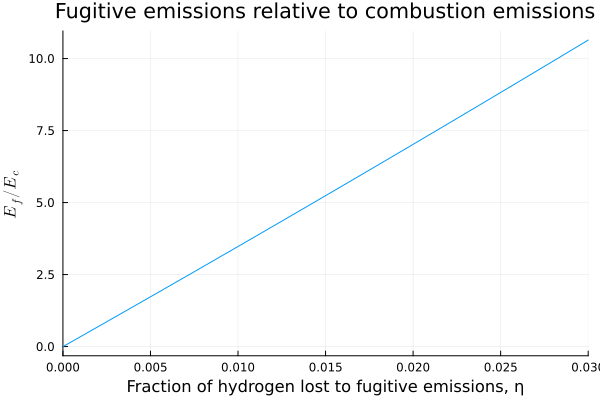

In [13]:
#| echo: false
#| label: fig-1
#| fig-cap: "The ratio of fugitive emissions to combustion emissions, as a function of leakage rate."

using Plots, LaTeXStrings

plot(fugitives_to_combustion, xlim=(0,0.03), lab=false,
     title="Fugitive emissions relative to combustion emissions",
     xlabel="Fraction of hydrogen lost to fugitive emissions, η",
     ylabel=L"E_{f} / E_{c}")

At any appreciable leak percentage the amount of hydrogen lost to fugitive emissions rivals the stack emissions for climate impact.

## Fugitive hydrogen and "net zero"

More relevant to a fuel switching program is to re-assess *how much of a reduction* switching to hydrogen achieves. Instead of comparing hydrogen to itself, we should compare hydrogen to the natural gas system that preceded it.

For the natural gas system the fugitive emissions are similar, except that I am assuming the only climate relevant component of natural gas is methane

$$ E_f = GWP_{CH4} \cdot \rho_{CH4} \cdot x_{CH4} \cdot \eta \cdot Q_{NG}$$

and the combustion emissions now include carbon dioxide and methane along with nitrous oxide

$$ E_c = \left( GWP_{CO2} \cdot EF_{CO2} + GWP_{CH4} \cdot EF_{CH4} + GWP_{N2O} \cdot EF_{N2O} \right) \left( 1 - \eta \right) Q_{NG} $$

Total emissions are just $E_T = E_f + E_c$.

What we are interested in is the ratio

$$ { E_{T,H2} \over E_{T,NG} } $$

### Some more simplifying assumptions

There are a few assumptions we need to make to proceed. The first is to assume that the system with natural gas and the system with hydrogen are operating under the same pressure. At the same pressure the hydrogen system will deliver [about the same energy in HHV](/posts/hydrogen_blending/#energy-per-unit-of-pressure-drop) as the natural gas system, slightly more (depending on the exact natural gas, etc.). Which makes this a plausible assumption. The whole point of the fuel delivery system is to deliver sufficient energy to a combustion device, in the form of fuel heating value. This is not exact, so a more detailed analysis would work out the actual pressure of the hydrogen system and that would add a whole layer of complication.

The second assumption is that the fraction of gas lost between the two systems is the same. At first blush this seems like a crazy assumption. I spent two sections talking about how significantly different the leak *rates* were, so what is going on here? Well the volumetric *leak rate* is higher with hydrogen but the *line flow rate* is also higher, and they are both higher by the same amount. It cancels out.

Suppose the leaks are all in the turbulent regime, so

$$ {Q_{leak,H2} \over Q_{leak,NG}} = \sqrt{\rho_{NG} \over \rho_{H2}} $$

For fully developed turbulent pipe flow we know the ratio of line flow rates is also

$$ { Q_{H2} \over Q_{NG} }  = \sqrt{\rho_{NG} \over \rho_{H2}} $$

By the definition of *&eta;*

$$ \eta_{H2} = { Q_{leak,H2} \over Q_{H2} } = { Q_{leak,H2} \over Q_{leak,CH4} } { Q_{CH4} \over Q_{H2} } { Q_{leak,CH4} \over Q_{CH4} } $$

$$ \eta_{H2} = \sqrt{\rho_{NG} \over \rho_{H2}} \sqrt{\rho_{H2} \over \rho_{NG}} \eta_{CH4} $$

$$ \eta_{H2} = \eta_{CH4} $$

### Relative emissions of switching to hydrogen

To make the math a little less tedious to type out, I am going to define two *emission factors*, the fugitive emission factor[^12]

$$ EF_f = {E_f \over Q_T} $$

and the combustion emission factor

$$ EF_c = {E_c \over Q_T} $$

Finally we can answer the question of "how much do the total emissions go down after switching to hydrogen?"

$$ { E_{T,H2} \over E_{T,NG} }  = { \left[ EF_{c} ( 1 - \eta ) + EF_{f} \eta \right]_{H2} \over \left[ EF_{c} ( 1 - \eta ) + EF_{f} \eta \right]_{NG} } { Q_{H2} \over Q_{NG} }$$

$$ { E_{T,H2} \over E_{T,NG} }  = { \left[ EF_{c} ( 1 - \eta ) + EF_{f} \eta \right]_{H2} \over \left[ EF_{c} ( 1 - \eta ) + EF_{f} \eta \right]_{NG} } \sqrt{ \rho_{NG} \over \rho_{H2} }$$

$$ { E_{T,H2} \over E_{T,NG} }  = { \left[ EF_{c} ( 1 - \eta ) + EF_{f} \eta \right]_{H2} \over \left[ EF_{c} ( 1 - \eta ) + EF_{f} \eta \right]_{NG} } \sqrt{ {SG}_{NG} \over {SG}_{H2} }$$


[^12]: Note that the flowrates here are at standard state. The volumetric emission factors, heating values, and densities are also at standard state thus this is equivalent to the relation at actual conditions.

In [14]:
# hydrogen
EF_f_H2 = GWP_H2*ρ_H2
EF_c_H2 = GWP_N2O*EF_N2O*HHV_H2

# methane
SG_CH4 = 0.5539 # GPSA
ρ_CH4 = SG_CH4*ρ_air

# natural gas
x_CH4 = 0.90 # Alberta typical
SG_NG = 0.61 # Alberta typical
EF_CO2_NG = 1.962u"kg/m^3"  # ECCC, 3.
EF_CH4_NG = 3.7e-5u"kg/m^3" # ECCC, 3.
EF_N2O_NG = 3.3e-5u"kg/m^3" # ECCC, 3.

EF_f_NG = GWP_CH4*ρ_CH4*x_CH4
EF_c_NG = EF_CO2_NG + GWP_CH4*EF_CH4_NG + GWP_N2O*EF_N2O_NG

# Final answer
emissions_ratio(η) = ((EF_c_H2*(1-η)+EF_f_H2*η)/(EF_c_NG*(1-η)+EF_f_NG*η))*√(SG_NG/SG_H2);

In [15]:
emissions_ratio(0.01)

0.017665064441514864

So switching to hydrogen has reduced the overall emissions from this system by ~98.2%. Which is pretty significant, though *it is not zero* even though this analysis is assuming *pure* hydrogen.

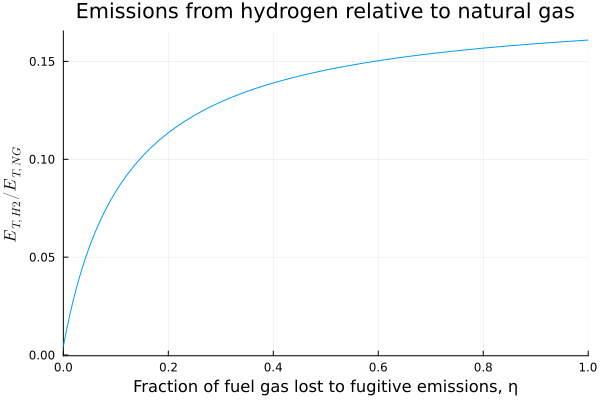

In [16]:
#| echo: false
#| label: fig-2
#| fig-cap: "The total emissions, in CO<sub>2</sub>-e, of hydrogen relative to natural gas."

plot(emissions_ratio, xlim=(0,1), lab=false,
     title="Emissions from hydrogen relative to natural gas",
     xlabel="Fraction of fuel gas lost to fugitive emissions, η",
     ylabel=L"E_{T,H2} / E_{T,NG}")

## Final thoughts

Even at relatively high leak rates, the total greenhouse gas emissions from a hydrogen system are a small fraction of that of a natural gas system. Transitioning to hydrogen does what you would expect: it radically reduces the climate impact of stationary combustion equipment. That said, it is not zero emissions. Which shifts the perspective on where hydrogen fits in the energy transition. If the goal is *zero* then hydrogen will not get us there by the simple fact that hydrogen has a significant global warming potential and fugitive emissions are unavoidable. If the goal is to radically decarbonize existing systems and run out the remaining life of a vast global fleet of process equipment, then transitioning to hydrogen may be a major player.

Hydrogen may also be limited by the fact that it is not a zero impact fuel with regards to all of the other air emissions that are more locally important, such as nitrogen oxides (NOx), VOCs, and ground level ozone. Hydrogen combustion does directly produce nitrogen oxides and direct hydrogen emissions impact atmospheric chemistry increasing VOC and ground level ozone concentrations. If the choice is between hydrogen combustion and electrification, well electrification actually is zero emissions -- both greenhouse gas emissions as well as other air pollutants -- and while electrification projects are more complex than hydrogen as a "drop-in" solution, that can be a pretty strong advantage. For example in airsheds that are already stressed for NOx, switching to hydrogen fuel gas may also require the installation post-combustion NOx reduction technology such as [SCR](https://en.wikipedia.org/wiki/Selective_catalytic_reduction), as hydrogen combustion generally produces more NOx than natural gas. Replacing stationary combustion equipment with their electric equivalents has the advantage that it reduces *all air emissions*.

## References
::: {#refs}
:::
